In [1]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import cv2
import numpy as np

In [4]:
!unzip /content/drive/MyDrive/DL_Assignment2/chest_xray_dataset.zip

Archive:  /content/drive/MyDrive/DL_Assignment2/chest_xray_dataset.zip
   creating: chest_xray_dataset/new_samples/
  inflating: chest_xray_dataset/new_samples/test1.jpeg  
  inflating: chest_xray_dataset/new_samples/test10.jpeg  
  inflating: chest_xray_dataset/new_samples/test11.jpeg  
  inflating: chest_xray_dataset/new_samples/test12.jpeg  
  inflating: chest_xray_dataset/new_samples/test13.jpeg  
  inflating: chest_xray_dataset/new_samples/test14.jpeg  
  inflating: chest_xray_dataset/new_samples/test15.jpeg  
  inflating: chest_xray_dataset/new_samples/test16.jpeg  
  inflating: chest_xray_dataset/new_samples/test17.jpeg  
  inflating: chest_xray_dataset/new_samples/test18.jpeg  
  inflating: chest_xray_dataset/new_samples/test19.jpeg  
  inflating: chest_xray_dataset/new_samples/test2.jpeg  
  inflating: chest_xray_dataset/new_samples/test20.jpeg  
  inflating: chest_xray_dataset/new_samples/test3.jpeg  
  inflating: chest_xray_dataset/new_samples/test4.jpeg  
  inflating: chest

In [8]:
normal_images_list = []  ## reading images of normal xrays from path and storing in this list
pneumonia_images_list = []  ## reading images of pneumonia xrays from path and storing in this list

for filename in glob.glob('chest_xray_dataset/val/NORMAL/*.jpeg'): 
    im= cv2.imread(filename)
    print(im.shape)
    normal_images_list.append(cv2.resize(im,(150,150)))
for filename in glob.glob('chest_xray_data/PNEUMONIA/*.jpeg'): 
    im= cv2.imread(filename)
    pneumonia_images_list.append(cv2.resize(im,(150,150)))
# print(a.shape)

(1665, 1902, 3)
(1113, 1500, 3)
(1785, 1863, 3)
(1360, 1418, 3)
(1632, 1949, 3)
(1384, 2022, 3)
(1360, 1666, 3)
(968, 1304, 3)
(1418, 1882, 3)
(1008, 1288, 3)
(1758, 2114, 3)
(936, 1248, 3)
(1410, 1724, 3)
(1372, 1742, 3)
(1190, 1492, 3)
(1576, 1746, 3)
(2326, 2091, 3)
(2458, 2720, 3)
(1133, 1562, 3)
(1291, 1516, 3)
(1194, 1500, 3)
(2124, 2522, 3)
(1945, 2214, 3)
(1473, 1778, 3)
(1128, 1360, 3)
(1654, 1878, 3)
(1329, 1580, 3)
(1592, 1836, 3)
(2071, 2022, 3)
(1290, 1666, 3)
(1201, 1496, 3)
(1989, 2272, 3)
(955, 1098, 3)
(1028, 1304, 3)
(1781, 1828, 3)
(1509, 2111, 3)
(1615, 1890, 3)
(1438, 1588, 3)
(1268, 1500, 3)
(1380, 1600, 3)
(1238, 1803, 3)
(2067, 2078, 3)
(1410, 1580, 3)
(1148, 1592, 3)
(2139, 2343, 3)
(1067, 1422, 3)
(1164, 1414, 3)
(2187, 2362, 3)
(1504, 1716, 3)
(2057, 2498, 3)
(1893, 2624, 3)
(1469, 1640, 3)
(2032, 2297, 3)
(1761, 1940, 3)
(1959, 2268, 3)
(1441, 1862, 3)
(1218, 1636, 3)
(1160, 1416, 3)
(1225, 1716, 3)
(1152, 1350, 3)
(1317, 1857, 3)
(1283, 1628, 3)
(617, 1300,

In [5]:
X = np.array(normal_images_list[:1500])
X = np.concatenate((X,np.array(pneumonia_images_list[:1500])))
y = np.zeros(len(normal_images_list[:1500]))
y = np.concatenate((y, np.ones(len(pneumonia_images_list[:1500]))))
## normalizing the images


In [6]:
x_scaled = X / 255
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, shuffle=True)
Image_shape = (150, 150,3)  ## image size for input to InceptionResNetV2

In [7]:
print(x_scaled.shape)
print(y.shape)

(3000, 150, 150, 3)
(3000,)


Part 2

In [8]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape = Image_shape)

219062272/219055592 [==============================] - 27s 0us/step


In [9]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [96]:
# class_model = models.Sequential()
# class_model.add(base_model)
# class_model.add(layers.Flatten())
# class_model.add(layers.Dense(256, activation='relu'))
# class_model.add(layers.Dense(1, activation='sigmoid'))

In [97]:
# add a global spatial average pooling layer
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(1, activation='sigmoid')(x)
# this is the model we will train
class_model = keras.Model(inputs=base_model.input, outputs=predictions)

In [98]:
class_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_579 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_579 (BatchN (None, 74, 74, 32)   96          conv2d_579[0][0]                 
__________________________________________________________________________________________________
activation_579 (Activation)     (None, 74, 74, 32)   0           batch_normalization_579[0][0]    
____________________________________________________________________________________________

In [102]:
class_model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(lr=2e-5),metrics=["accuracy"])

In [103]:
model_data = class_model.fit(x_train, y_train, batch_size=75, epochs=5, validation_split=0.1)

Epoch 1/5
26/26 [==============================] - 77s 2s/step - loss: 0.4841 - accuracy: 0.7673 - val_loss: 0.7582 - val_accuracy: 0.6714
Epoch 2/5
26/26 [==============================] - 37s 1s/step - loss: 0.1408 - accuracy: 0.9641 - val_loss: 0.3051 - val_accuracy: 0.8714
Epoch 3/5
26/26 [==============================] - 37s 1s/step - loss: 0.0672 - accuracy: 0.9838 - val_loss: 0.2586 - val_accuracy: 0.9095
Epoch 4/5
26/26 [==============================] - 37s 1s/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.3078 - val_accuracy: 0.8762
Epoch 5/5
26/26 [==============================] - 37s 1s/step - loss: 0.0128 - accuracy: 0.9986 - val_loss: 0.2184 - val_accuracy: 0.9238


In [104]:
accuracyy = model_data.history['accuracy']
loss = model_data.history['loss']
val_accuracy = model_data.history['val_accuracy']
val_loss = model_data.history['val_loss']

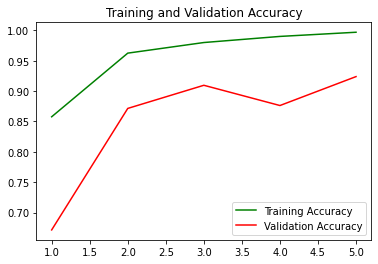

In [105]:
epochs = range(1,len(accuracyy)+1)

import matplotlib.pyplot as plt

plt.plot(epochs, accuracyy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

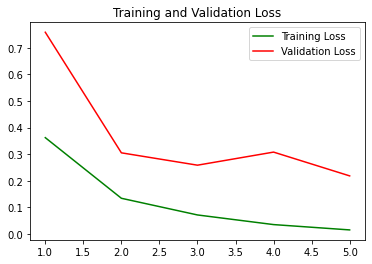

In [106]:
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [107]:
score = class_model.evaluate(x_test, y_test)


29/29 [==============================] - 6s 190ms/step - loss: 0.2205 - accuracy: 0.9233


In [113]:
new_list = []
for filename in glob.glob('test2.jpeg'): 
    im= cv2.imread(filename)
    new_list.append(cv2.resize(im,(150,150)))

In [114]:
X_new = np.array(new_list[:1])
x_new = X_new / 255

In [115]:
print(x_new.shape)

(1, 150, 150, 3)


In [116]:
yhat = class_model.predict(x_new)

In [117]:
if yhat > 0.5:
  print("Pneumonia detected")
else:
  print("Pneumonia not detected")

Pneumonia not detected


Part 3

In [10]:
!unzip /content/drive/MyDrive/DL_Assignment2/chest_xray_test_data.zip

Archive:  /content/drive/MyDrive/DL_Assignment2/chest_xray_test_data.zip
   creating: chest_xray_test_data/NORMAL/
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1427-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1430-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1431-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1436-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1437-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1438-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1440-0001.jpeg  
  inflating: chest_xray_test_data/NORMAL/NORMAL2-IM-1442-0001.jpeg  
   creating: chest_xray_test_data/PNEUMONIA/
  inflating: chest_xray_test_data/PNEUMONIA/person1946_bacteria_4874.jpeg  
  inflating: chest_xray_test_data/PNEUMONIA/person1946_bacteria_4875.jpeg  
  inflating: chest_xray_test_data/PNEUMONIA/person1947_bacteria_4876.jpeg  
  inflating: chest_xray_test_data/PNEUMONIA/person1949_bacte

In [11]:
normal_images_test_list = []  ## reading images of normal xrays from path and storing in this list
pneumonia_images_test_list = []  ## reading images of pneumonia xrays from path and storing in this list

for filename in glob.glob('chest_xray_test_data/NORMAL/*.jpeg'): 
    im= cv2.imread(filename)
    normal_images_test_list.append(cv2.resize(im,(150,150)))
for filename in glob.glob('chest_xray_test_data/PNEUMONIA/*.jpeg'): 
    im= cv2.imread(filename)
    pneumonia_images_test_list.append(cv2.resize(im,(150,150)))


In [12]:
X_pred = np.array(normal_images_test_list[:8])
X_pred = np.concatenate((X_pred,np.array(pneumonia_images_test_list[:8])))
y_pred = np.zeros(len(normal_images_test_list[:8]))
y_pred = np.concatenate((y_pred, np.ones(len(pneumonia_images_test_list[:8]))))
## normalizing the images
X_pred_scale = X_pred / 255

In [13]:
X_pred.shape

(16, 150, 150, 3)

In [14]:
# add a global spatial average pooling layer
l = base_model.output
l = layers.GlobalAveragePooling2D()(l)
# let's add a fully-connected layer
# and a logistic layer -- let's say we have 200 classes
predictions = layers.Softmax()(l)
# x = layers.Dense(1, activation='sigmoid')(predictions)
# this is the model we will train
updated_model = keras.Model(inputs=base_model.input, outputs=predictions)

In [15]:
updated_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
yhat = updated_model.predict(X_pred_scale)

In [17]:
yhat.shape

(16, 1536)

In [18]:
import pandas as pd

In [19]:
neurons_data = pd.DataFrame(yhat)

In [20]:
neurons_data['Class_Label'] = y_pred

In [21]:
correlated_data = neurons_data.corr()

In [22]:
class_label_correlation = correlated_data.iloc[:,-1]

In [23]:
class_label_correlation = list(class_label_correlation)[:-1]

In [24]:
top_5_positive_correlated_idx = sorted(range(len(class_label_correlation)), key=lambda i: class_label_correlation[i], reverse=True)[:5]
top_5_negative_correlated_idx = sorted(range(len(class_label_correlation)), key=lambda i: class_label_correlation[i], reverse=False)[:5]

In [25]:
highly_correlated_neurons_list = top_5_positive_correlated_idx + top_5_negative_correlated_idx

In [28]:
highly_correlated_neurons_list.sort()
print(highly_correlated_neurons_list)

[108, 220, 241, 267, 279, 782, 834, 875, 1170, 1435]


Part 4

10


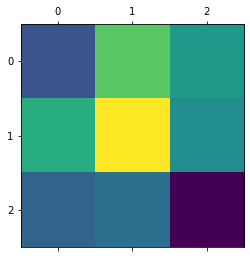

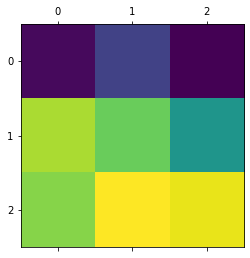

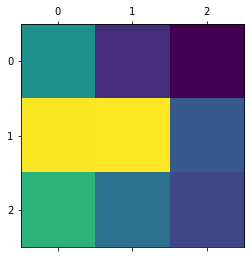

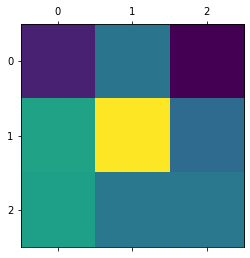

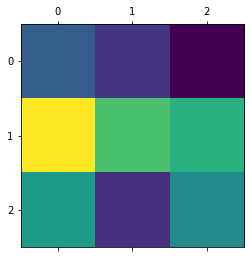

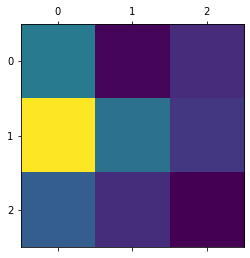

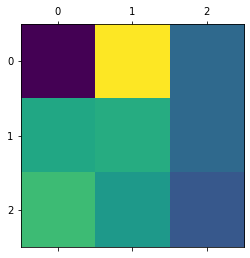

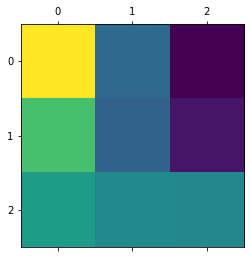

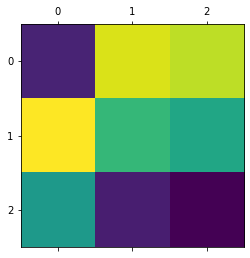

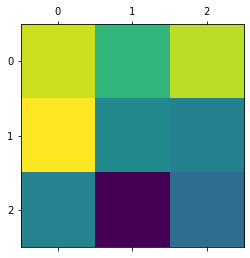

In [79]:
total_layers = len(base_model.layers)
output_layers = [layer.output for layer in base_model.layers[total_layers-2:total_layers]]
activation_model = models.Model(inputs = base_model.input, outputs = output_layers)
activation_predictions = activation_model.predict(X_pred_scale)
activations = activation_predictions[1]
i = 0
for neuron in highly_correlated_neurons_list:
  i+=1
  plt.matshow(activations[0,:,:,neuron],cmap='viridis')
print(i)